In [ ]:
# the goal of this project is to predict sale 

In [2]:
# import package
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import tensorflowjs as tfjs


In [3]:
# data and EDA

# import the data
data= pd.read_csv(r"data\Train.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# copy the data
df=data.copy()

In [5]:
df.shape


(8523, 12)

In [6]:
df.dtypes.value_counts()

object     7
float64    4
int64      1
dtype: int64

In [7]:
# Check the missing value

df.isna().sum()/df.shape[0]

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
# the categorical data
for col in df.select_dtypes('object'):
    print(f'{col :-<20} {df[col].unique()}')

Item_Identifier----- ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content---- ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type----------- ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier--- ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size--------- ['Medium' nan 'High' 'Small']
Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type--------- ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [10]:
#  variable encoding 
code={

    'FDA15':0,
    'DRC01':1,
    'FDN15':2,
    'NCF55':3,
    'NCW30':4,
    'NCW05':5,
    '...':59,
    'Low Fat':0,
    'Regular':1,
    'low fat':2,
    'LF':3,
    'reg':4,
    'Dairy':0,
    'Soft Drinks':1,
    'Meat':2,
    'Fruits and Vegetables':3,
    'Household':4,
    'Baking Goods':5, 
    'Snack Foods':6,
    'Frozen Foods':7,
    'Breakfast':8,
    'Health and Hygiene':9,
    'Health and Hygiene':10,
    'Hard Drinks':11,
    'Canned':12,
    'Breads':13,
    'Starchy Foods':14,
    'Others':15,
    'Seafood':16,
    'OUT049':0,
    'OUT018':1,
    'OUT010':2, 
    'OUT013':3, 
    'OUT027':4, 
    'OUT045':5, 
    'OUT017' :6,
    'OUT046':7,
    'OUT035' :8,
    'OUT019':9,
    'Medium' :0,
    'High':1, 
    'Small':2,
    'nan':50, 
    'Tier 1':0,
    'Tier 3' :1,
    'Tier 2':2,
    'Supermarket Type1':0,
    'Supermarket Type2':1,
    'Grocery Store':2,
    'Supermarket Type3':3

}

df_01=df.copy()

for col in df.select_dtypes('object'):
    df[col]=df[col].map(code)

In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.0,9.30,0,0.016047,0,249.8092,0,1999,0.0,0,0,3735.1380
1,1.0,5.92,1,0.019278,1,48.2692,1,2009,0.0,1,1,443.4228
2,2.0,17.50,0,0.016760,2,141.6180,0,1999,0.0,0,0,2097.2700
3,NaN,19.20,1,0.000000,3,182.0950,2,1998,NaN,1,2,732.3800
4,NaN,8.93,0,0.000000,4,53.8614,3,1987,1.0,1,0,994.7052


In [12]:
df.isna().sum()/df.shape[0]

Item_Identifier              0.996715
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [13]:
# handle missing value
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [14]:
df['Outlet_Size']=df['Outlet_Size'].fillna(value=1)

C:\Users\Charles lf\AppData\Local\Temp\ipykernel_8184\1729564373.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Outlet_Size'])


0.9524815205913411


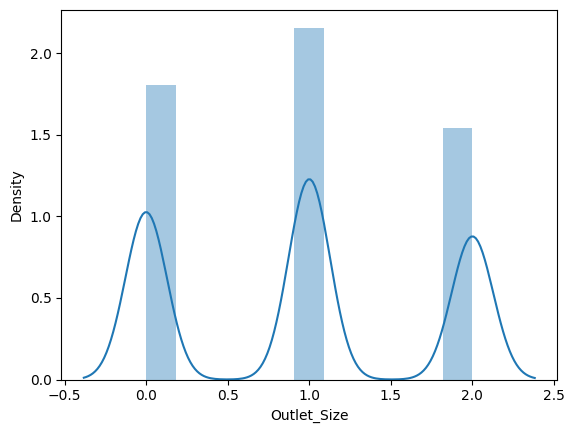

In [15]:
sns.distplot(df['Outlet_Size'])
print(df['Outlet_Size'].mean())

In [16]:
df['Item_Outlet_Sales']

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [17]:
df.isna().sum()/df.shape[0]

Item_Identifier              0.996715
Item_Weight                  0.000000
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.000000
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

<AxesSubplot: >

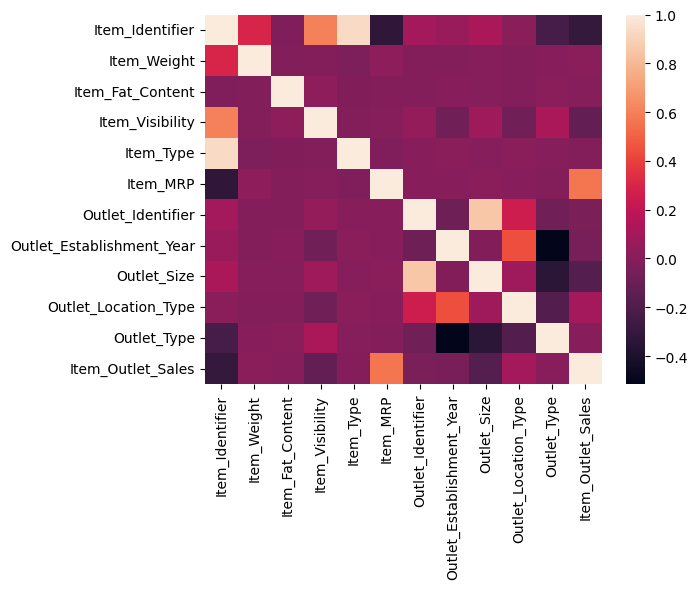

In [18]:
plt.figure()
sns.heatmap(df.corr())

In [19]:
# split the dataset
from sklearn.model_selection import train_test_split
trainset, testset= train_test_split(df, test_size=0.2, random_state=123)

In [20]:
# the split function
def split(df):
    X=df.drop(["Item_Identifier","Item_Outlet_Sales"], axis=1)
    y=df["Item_Outlet_Sales"]
    return X,y

In [21]:
X_train, y_train = split(trainset)
X_test, y_test =split(testset)

In [22]:
# the model

def the_model():
    inputs=keras.Input(shape=(10))
    x=layers.BatchNormalization()(inputs)
    x=layers.Dense(32, activation='relu')(x)
    x=layers.BatchNormalization()(x)
    x=layers.Dense(64, activation='relu')(x)
    x=layers.Dense(164, activation='relu')(x)
    outputs=layers.Dense(1, activation='relu')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)

    return model


model=the_model()

model.summary()

model.compile(
    loss='mean_absolute_error',
    optimizer=keras.optimizers.Adam(learning_rate=0.01)
)

model.fit(X_train, y_train, epochs=300, verbose=2, batch_size=64)

model.evaluate(X_test, y_test, batch_size=64, verbose=2)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 32)                352       
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 164)               10660 

770.8990478515625

In [23]:
model.predict(X_test[:2])

1/1 [==============================] - 9s 9s/step


array([[619.4485 ],
       [356.94034]], dtype=float32)

In [24]:
y_test[:2]

C:\Users\Charles lf\AppData\Local\Temp\ipykernel_8184\1739259011.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:2]


4532    479.3760
186     657.8104
Name: Item_Outlet_Sales, dtype: float64

In [25]:
tfjs.converters.save_keras_model(model, './models')